1. Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [41]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [42]:
home_price = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv")
home_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [43]:
home_price.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no
5,45000.0,3500,2,1,1,no,no,yes,no,no,0,no
6,61700.0,4032,2,1,1,yes,no,yes,no,no,0,no
7,54500.0,3150,2,2,1,no,no,yes,no,no,0,no
8,66500.0,3745,3,1,2,yes,no,yes,no,no,0,no
9,44000.0,2160,3,1,2,no,no,yes,no,no,0,no


In [38]:
home_price_aircon = home_price[(home_price['airco'] == 'yes')]
home_price_aircon.info()

home_price_no_aircon = home_price[(home_price['airco'] == 'no')]
home_price_no_aircon.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

 There are 173 home with aircon and there are 373 without aircon. Of the total 546 homes there are 31% with airconditioning 
and 68% do not have airconditioning.

In [44]:
home_price_aircon.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
373,66000.0,4160,3,1,1,yes,yes,yes,no,yes,0,no
374,90000.0,7200,3,2,1,yes,no,yes,no,yes,3,no
375,48500.0,4785,3,1,2,yes,yes,yes,no,yes,1,no
376,44000.0,4960,2,1,1,yes,no,yes,no,yes,0,no
377,70000.0,4520,3,1,2,yes,no,yes,no,yes,0,no


In [62]:
home_price_no_aircon.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


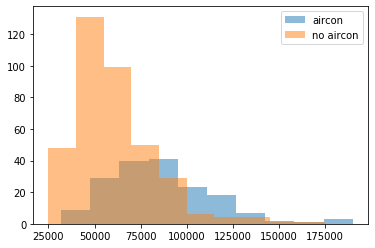

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [81]:
plt.hist(home_price_aircon['price'], alpha = .5,label = 'aircon')
plt.hist(home_price_no_aircon['price'], alpha = .5, label = 'no aircon' )
plt.legend()
plt.show()

print(stats.describe(home_price_aircon ['price']))
print(stats.describe(home_price_no_aircon['price']))



The home with aircon has a skewness of .85  and kurtosis of .,96 which closer to 0 which means that it is close to a bell curve.  The home with no aircon has a skewness is 1.4 and kurtosis is 3.4 which is acceptable to proceed with further test.

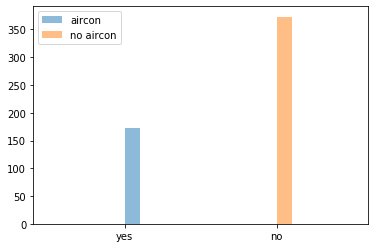

In [80]:
plt.hist(home_price_aircon['airco'], alpha = .5, label = 'aircon' )
plt.hist(home_price_no_aircon['airco'], alpha = .5, label = 'no aircon' )
plt.legend()
plt.show()


This graph simply provides visualization of the difference in number between aircon and non-aircon home

In [50]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(home_price_aircon['price'], home_price_no_aircon['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857.'

In [77]:
stats.ttest_ind(home_price_aircon['price'],home_price_no_aircon['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

The results shows that our ttest statistics is greater than 1.96 and pvalue of 4.9 which means that there is a 4.9% chance of observing a difference as large as what is observed even if the two population means identical (the null hypothesis is true).

[[Text(0, 0, 'home_price_aircon'), Text(0, 0, 'home_price_no_aircon')]]

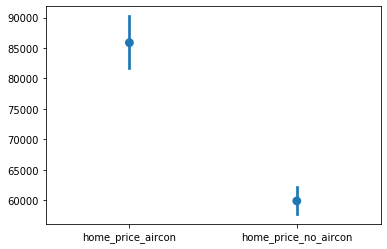

In [51]:
import seaborn as sns

g = sns.pointplot(data=[home_price_aircon['price'],
                        home_price_no_aircon['price']], join=False)
                        
g.set(xticklabels = ['home_price_aircon', 'home_price_no_aircon'])

The home with aircon has a higher selling price compared to homes with no aircon.  

2. Homes with a full basement have a higher sales price than homes without a full basement?

In [52]:
home_basement = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv")
home_basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [60]:
home_basement.head(100)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,52000.0,2850,3,2,2,no,no,yes,no,no,0,yes
96,91700.0,6750,2,1,1,yes,yes,yes,no,no,2,yes
97,61100.0,3400,3,1,2,yes,no,yes,no,no,2,yes
98,66000.0,2870,2,1,2,yes,yes,yes,no,no,0,yes


In [57]:
home_full_basement= home_basement[(home_basement['fullbase'] == 'yes')]
home_basement.info()

home_no_full_basement = home_basement[(home_basement['fullbase'] == 'no')]
home_basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64

In [63]:
home_full_basement.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [64]:
home_no_full_basement.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
125,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
126,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
127,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
128,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
129,69000.0,4160,3,1,3,yes,no,no,no,no,0,no


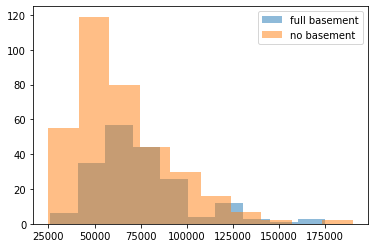

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [86]:
plt.hist(home_full_basement['price'], alpha = .5,label = 'full basement')
plt.hist(home_no_full_basement['price'], alpha = .5, label = 'no basement' )
plt.legend()
plt.show()

print(stats.describe(home_full_basement ['price']))
print(stats.describe(home_price_no_aircon['price']))


The skewness and kurtosis of both home with full basement and home without basement are almost similar.  They are both skewed on the the right.  For the kurtosis the home with no basement has a higher peak than the home with basement.

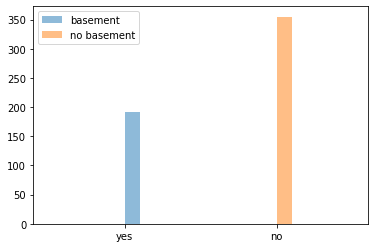

In [85]:
plt.hist(home_full_basement['fullbase'], alpha = .5, label = 'basement' )
plt.hist(home_no_full_basement['fullbase'], alpha = .5, label ='no basement' )
plt.legend()
plt.show()

There are more homes without basement compare t homes with basement

In [68]:
stats.ttest_ind(home_full_basement['price'],home_no_full_basement['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [ ]:
The ttest statistics 4.42 is greater that 1.9 standard and the pvalue is 1.18% chance of observing a difference as large as 
what is observed even if the two population means identical (the null hypothesis is true)

In [69]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(home_full_basement['price'], home_no_full_basement['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

[[Text(0, 0, 'home_full_basement'), Text(0, 0, 'home_no_full_basement')]]

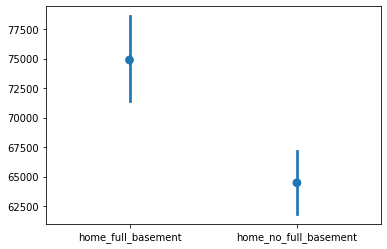

In [70]:
import seaborn as sns

g = sns.pointplot(data=[home_full_basement['price'],
                        home_no_full_basement['price']], join=False)
                        
g.set(xticklabels = ['home_full_basement', 'home_no_full_basement'])

In [ ]:
The home with full basement has a higher price compared to home without basement.